In [62]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import tree

In [63]:
df = sns.load_dataset("titanic")

In [64]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [66]:
x = df[['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare']]
y = df['survived']

In [67]:
x = pd.get_dummies(x, columns=['sex'])

In [68]:
x.isnull().sum()

pclass          0
age           177
sibsp           0
parch           0
fare            0
sex_female      0
sex_male        0
dtype: int64

In [69]:
x.age.fillna(value = x['age'].mean(), inplace=True)

C:\Users\KING\AppData\Local\Temp\ipykernel_14312\3171675253.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  x.age.fillna(value = x['age'].mean(), inplace=True)


In [70]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# Decision Tree

In [71]:
model = DecisionTreeClassifier()
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [72]:
y_pred = model.predict(x_test)

In [73]:
print("Accuracy: ", accuracy_score(y_test, y_pred))

Accuracy:  0.7486033519553073


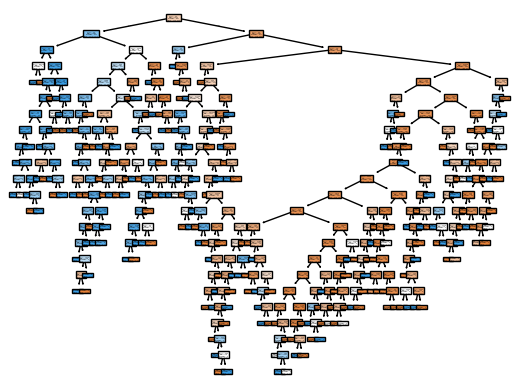

<Figure size 640x480 with 0 Axes>

In [74]:
tree.plot_tree(model.fit(x,y), filled=True)
plt.show()
plt.savefig('tree.png')

In [75]:
# Precision Matrics
from sklearn.metrics import precision_score, recall_score, f1_score

precision_score(y_test, y_pred)

np.float64(0.7076923076923077)

# Precision measures the proportion of true positive predictions among all positive predictions

In [76]:
recall_score(y_test, y_pred)

np.float64(0.6388888888888888)

# Recall measures the proportion of true positive predictions among all  actual positive instances

In [77]:
f1_score(y_test, y_pred)

np.float64(0.6715328467153284)

In [79]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

Text(50.722222222222214, 0.5, 'True label')

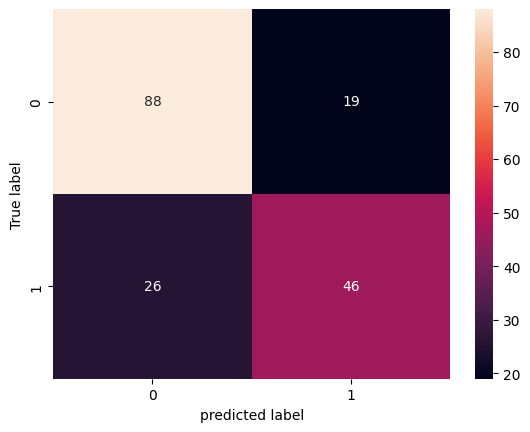

In [83]:
sns.heatmap(cm, annot=True)
plt.xlabel('predicted label')
plt.ylabel('True label')

# K Nearest Neighbours (KNN)

In [99]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=3)

model.fit(x_train, y_train)


KNeighborsClassifier(n_neighbors=3)

In [94]:
y_pred = model.predict(x_test)

cm = confusion_matrix(y_test, y_pred)
cm

array([[87, 20],
       [32, 40]])

In [96]:
precision_score(y_test, y_pred)

np.float64(0.6666666666666666)

In [97]:
recall_score(y_test, y_pred)

np.float64(0.5555555555555556)

In [98]:
f1_score(y_test, y_pred)

np.float64(0.6060606060606061)

Text(50.722222222222214, 0.5, 'True label')

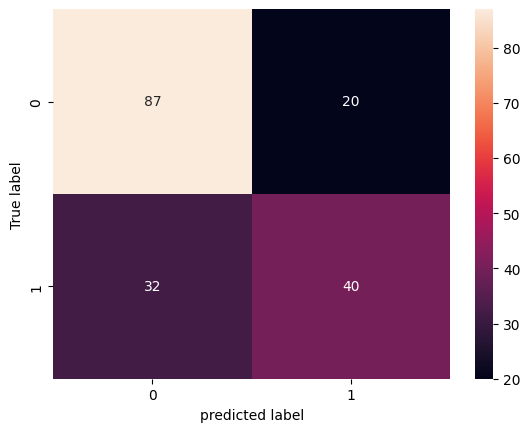

In [95]:
sns.heatmap(cm, annot=True)
plt.xlabel('predicted label')
plt.ylabel('True label')

# Random forest

In [102]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()

model.fit(x_train, y_train)
y_pred = model.predict(x_test)

cm = confusion_matrix(y_test, y_pred)
print("confusion_matrix: ", cm)
print("precision_score: ", precision_score(y_test, y_pred))
print("recall_score: ", recall_score(y_test, y_pred))
print("f1_score: ", f1_score(y_test, y_pred))

confusion_matrix:  [[91 16]
 [18 54]]
precision_score:  0.7714285714285715
recall_score:  0.75
f1_score:  0.7605633802816901


Text(50.722222222222214, 0.5, 'True label')

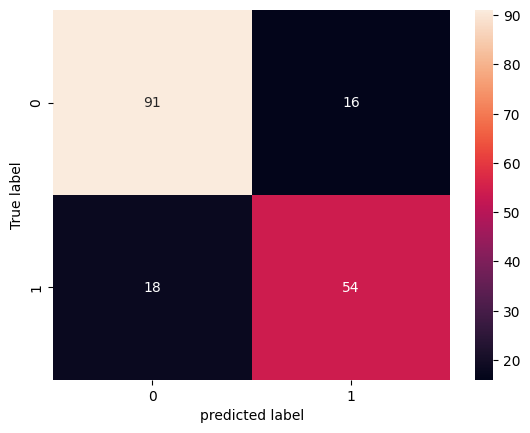

In [103]:
sns.heatmap(cm, annot=True)
plt.xlabel('predicted label')
plt.ylabel('True label')

# Logistic Regression

In [104]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

model.fit(x_train, y_train)
y_pred = model.predict(x_test)

cm = confusion_matrix(y_test, y_pred)
print("confusion_matrix: ", cm)
print("precision_score: ", precision_score(y_test, y_pred))
print("recall_score: ", recall_score(y_test, y_pred))
print("f1_score: ", f1_score(y_test, y_pred))

confusion_matrix:  [[96 11]
 [17 55]]
precision_score:  0.8333333333333334
recall_score:  0.7638888888888888
f1_score:  0.7971014492753623


c:\Users\KING\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Text(50.722222222222214, 0.5, 'True label')

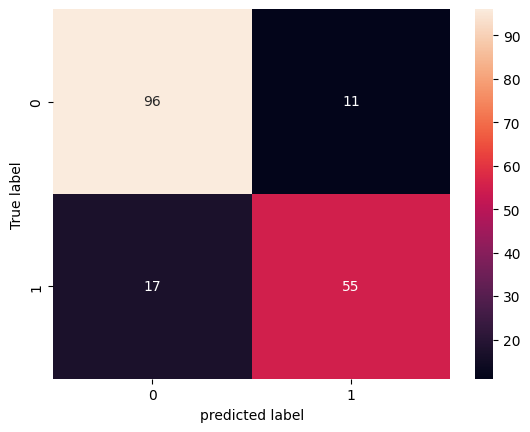

In [105]:
sns.heatmap(cm, annot=True)
plt.xlabel('predicted label')
plt.ylabel('True label')

# Support Vector Machine (SVM)

In [106]:
from sklearn.svm import SVC

model = SVC()

model.fit(x_train, y_train)
y_pred = model.predict(x_test)

cm = confusion_matrix(y_test, y_pred)
print("confusion_matrix: ", cm)
print("precision_score: ", precision_score(y_test, y_pred))
print("recall_score: ", recall_score(y_test, y_pred))
print("f1_score: ", f1_score(y_test, y_pred))

confusion_matrix:  [[99  8]
 [55 17]]
precision_score:  0.68
recall_score:  0.2361111111111111
f1_score:  0.35051546391752575


Text(50.722222222222214, 0.5, 'True label')

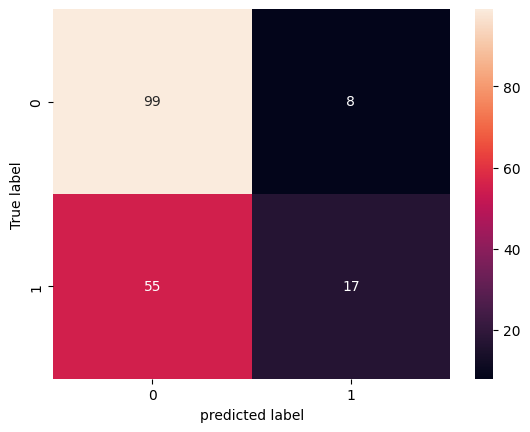

In [107]:
sns.heatmap(cm, annot=True)
plt.xlabel('predicted label')
plt.ylabel('True label')

# NAIVE Bayes

In [108]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()

model.fit(x_train, y_train)
y_pred = model.predict(x_test)

cm = confusion_matrix(y_test, y_pred)
print("confusion_matrix: ", cm)
print("precision_score: ", precision_score(y_test, y_pred))
print("recall_score: ", recall_score(y_test, y_pred))
print("f1_score: ", f1_score(y_test, y_pred))

confusion_matrix:  [[93 14]
 [19 53]]
precision_score:  0.7910447761194029
recall_score:  0.7361111111111112
f1_score:  0.762589928057554


Text(50.722222222222214, 0.5, 'True label')

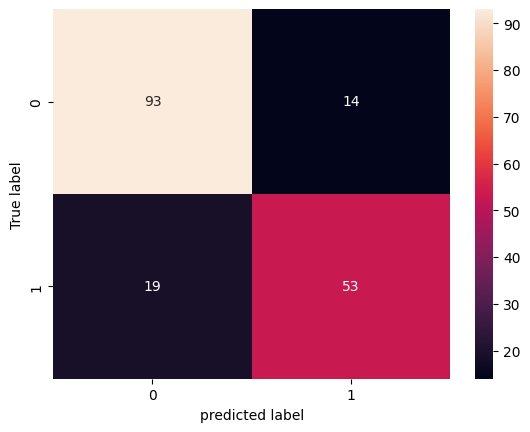

In [109]:
sns.heatmap(cm, annot=True)
plt.xlabel('predicted label')
plt.ylabel('True label')

# Best Model Selection

In [113]:
# import libraries and models

import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# define the models to be evaluated
models = [LogisticRegression(), KNeighborsClassifier(), RandomForestClassifier(), SVC()]
names = ['Logistic Regression', 'K-Nearest Neighbors', 'Random Forest', 'SVM']

# perform k-fold cross-validation for each model

k=10
for name, model in zip(names, models):
    cv_scores = cross_val_score(model, x_train, y_train, cv=k)

    print(f"{name} CV accuracy: {np.mean(cv_scores):.3f} +/- {np.std(cv_scores):.3f}")

c:\Users\KING\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\KING\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

Logistic Regression CV accuracy: 0.788 +/- 0.045
K-Nearest Neighbors CV accuracy: 0.712 +/- 0.036
Random Forest CV accuracy: 0.830 +/- 0.035
SVM CV accuracy: 0.691 +/- 0.036


In [114]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = { 'C': [0.1, 1, 10],
               'kernel': ['linear', 'rbf'],
               'gamma': [1, 0.1, 0.01] }

grid_search = GridSearchCV(SVC(), param_grid, cv=5)
grid_search.fit(x_train, y_train)

print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'C': 0.1, 'gamma': 1, 'kernel': 'linear'}
Best cross-validation score: 0.78
